### Dynamic Analysis of Emotions through Artificial Intelligence (Mejia & Quintero, 2016)
Reasons to study emotions:
1. They are not predictable.
2. Gives information about how a person percives the world.
3. **Emotions play a significant role in human decision-making process**.

**Question:** Can two completely different branches of knowledge (math & psychology) be studied and applied together for the benefit and growth of both?

**Methods:**
* Dynamical systems theory
* Fuzzy clustering techniques
* Russel's AV-Space concept

Psychology’s features hinder any mathematical approach: 
* the study subjects have individual differences, so it is impossible to reproduce change because there is no way to erase what has been learned from an experience.
* some psychological aspects cannot been generalized with statistics because they fail Quetelet’s assumptions (especially the first of Quetelet’s premises: The causes are proportional to the effects). Individuals present different behaviors in response to the same cause; indeed, the plot thickens to the point that each individual can present different behaviors in response to the same cause under different circumstances. 

There are four elements that allow conceptualizing an emotion:
1. Event: internal or external.
2. Appraisement: when the subject measures the relevance and utility of the event, as affecting the individual, and the resources to face it.
3. The answer:
    * the physiological component: involuntary biological answers impossible to control
    * the behavioral component: associated with memory of previous events
    * the human-learning process, i.e., according to the event perceived, a characteristic behavior is going to appear to those similar events and the cognitive component (the feeling itself).
4. Action

# Fuzzy Inference Systems for Emotion Recognition

## Abstract
Studying emotions is an important task due to emotion's effect in people's behavior and decision-making process, and they reflect how people interact with the surrounding world. It is a fact that emotions play a significant role in diverse fields such as marketing, education, psychology and many other disciplines. We used the rule-based Mamdani's model to compute the angle and intensity from Russell's AV-space.

## Introduction
Mathematical  modeling of real systems is an important task in many disciplines to perform simulations and understand the underlying processes and behavior to be able to intervene and control the system adequately. This is a challenging task, and for complex nonlinear systems the complexity of the model increases in order to achieve the necessary accuracy. Fuzzy modeling and control are typical examples of techniques that make use of human knowledge and deductive processes [1].

Mamdani's linguistic fuzzy models are rule-based, where the set of rules can be defined by an expert or by using data analysis techniques when data is available. Each rule establishes a logical relation between linguistic (qualitative) variables. Zadeh proposed in 1973 the system modeling and analysis by using linguistic variables \cite{zadeh1973}. This framework is innovative in the sense it does not necessarily require data to be developed, and membership functions provide the possibility to extract qualitative and quantitative data for a better understanding. 

An unpredictable, highly complex and nonlinear system is the emotions system, where linguistic models represent a good alternative since emotions are often studied from a linguistic approach. Psychology studies usually describe the emotions of a person as a qualitative value that changes in short intervals of time.

Studying emotions is an important task due to the importance of quantifying and assessing its effect on people's behavior. It is a fact that emotions are an important aspect that play a significant role in human decision-making processes, affect leadership and the productivity in the workplace.

## Methodology and results

### Fuzzy Inference System

#### Software requirements
The model was developed in Python, with SciKit-fuzzy, a fuzzy logic toolbox for SciPy. These software requirements are all open source in order to make it available for everyone.
* SciPy, NumPy, Matplotlib (https://www.scipy.org/)
* SciKit-fuzzy (http://pythonhosted.org/scikit-fuzzy/)

#### Datasets
Results were obtained by using two Datasets as input for the FIS, both contain a set of numbers, each of them referring to an specific emotion. Dataset 1 was provided by GRIMMAT – Research group in mathematical modeling, with six possible emotions extracted from electroencephalography (EEG) and a total of 2796 data points. Table 1 shows the frequency of emotions in this dataset. Dataset 2 was obtained from daily emotional state with Daylio, a mood tracking app. The app has five possible moods, in order to use the same set of emotions we replaced the moods from the app for the most similar emotion:
* Awful $\rightarrow$ Disgust
* Bad $\rightarrow$ Sadness
* Meh $\rightarrow$ Boredom
* Good $\rightarrow$ Happiness
* Rad $\rightarrow$ Amusement

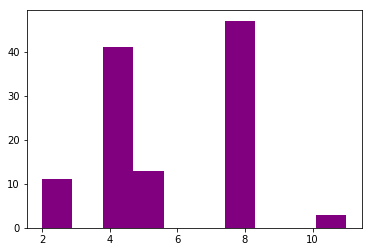

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

# path = '/home/valentina/Github/AI/FIS/dataset_1.txt'
path = '/home/valentina/Github/AI/FIS/dataset_2.txt'

# Import data 
with open(path) as f:
    data = np.loadtxt(f, dtype='int', comments="#", skiprows=1, usecols=None)

data = np.ravel(data)   # 'flatten' data

# Make histogram of the dataset
n, bins, patches = plt.hist(data, facecolor='purple')
plt.show()

In [2]:
import collections

# Frequency
counter = collections.Counter(data)
for i in range(13):
    if counter[i]:
        print('Emotion '+str(i)+' appears '+str(counter[i])+' times')

Emotion 2 appears 11 times
Emotion 4 appears 41 times
Emotion 5 appears 13 times
Emotion 8 appears 47 times
Emotion 11 appears 3 times


<center>Table 1. Frequency table for Dataset 1.</center>

| # |   Name    | count |
|---| --------- | ----- |
|1  |   Anger   | 1212  |
|2  |  Disgust  |  318  |
|3  |    Fear   |  629  |
|4  | Happiness |   18  |
|5  |  Sadness  |  618  |
|8  |  Boredom  |    1  |
|   | **Total** |**2796**|

<center><br><br>Table 2. Frequency table for Dataset 2.</center>

| # |   Name    | count |
|---| --------- | ----- |
|2  |  Disgust  |   11  |
|4  | Happiness |   41  |
|5  |  Sadness  |   13  |
|8  |  Boredom  |   47  |
|11 | Amusement |    3  |
|   | **Total** |**115**|

Input data is a time series of integers in [0, 12]. The figure below shows a fragment of Dataset 2.

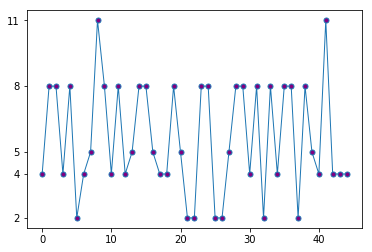

In [3]:
fig, ax = plt.subplots()
ax.plot(data[70:], '-o', ms=5, lw=1, mfc='purple')
plt.yticks([2, 4, 5, 8, 11])
plt.show()

#### Membership functions and rule bases for Mamdani's Model

Membership functions were defined based in Mejía *et al.* (2016). Membership functions are defined in that paper by the expert using knowledge or the data and algorithms that allow the construction of the functions with fuzzy clustering data techniques. Both Arousal and Valence range from -5 to 5, angle range from 0 to 365 and Intensity from 0 to 7. The following figures show the membership functions that were used-in: (i) arousal, (ii) valence, (iii) angle and (iv) intensity.

/home/valentina/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


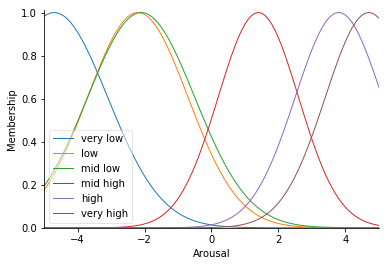

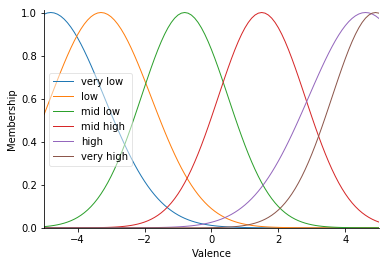

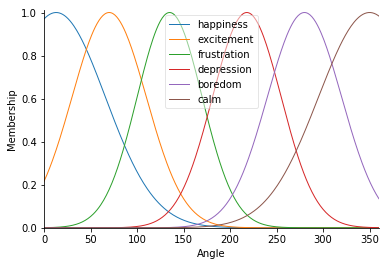

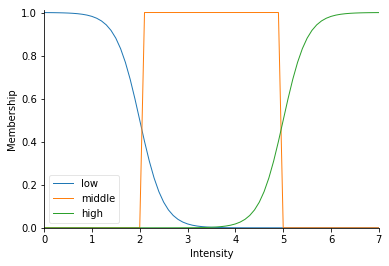

In [4]:
# Antecedent/Consequent objects hold universe variables and membership functions
arousal = ctrl.Antecedent(np.arange(-5, 5.1, 0.1), 'Arousal')
valence = ctrl.Antecedent(np.arange(-5, 5.1, 0.1), 'Valence')
angle = ctrl.Consequent(np.arange(0, 361, 1), 'Angle')
intensity = ctrl.Consequent(np.arange(0, 7.1, 0.1), 'Intensity')

# Membership functions
arousal['very low'] = fuzz.gaussmf(arousal.universe, -4.7, 1.6)
arousal['low'] = fuzz.gaussmf(arousal.universe, -2.2, 1.5)
arousal['mid low'] = fuzz.gaussmf(arousal.universe, -2.1, 1.6)
arousal['mid high'] = fuzz.gaussmf(arousal.universe, 1.4, 1.2)
arousal['high'] = fuzz.gaussmf(arousal.universe, 3.8, 1.3)
arousal['very high'] = fuzz.gaussmf(arousal.universe, 4.7, 1.3)

valence['very low'] = fuzz.gaussmf(valence.universe, -4.8, 1.6)
valence['low'] = fuzz.gaussmf(valence.universe, -3.3, 1.5)
valence['mid low'] = fuzz.gaussmf(valence.universe, -0.8, 1.3)
valence['mid high'] = fuzz.gaussmf(valence.universe, 1.5, 1.3)
valence['high'] = fuzz.gaussmf(valence.universe, 4.6, 1.7)
valence['very high'] = fuzz.gaussmf(valence.universe, 4.9, 1.3)

angle['happiness'] = fuzz.gaussmf(angle.universe, 13, 53)
angle['excitement'] = fuzz.gaussmf(angle.universe, 70, 40)
angle['frustration'] = fuzz.gaussmf(angle.universe, 135, 35)
angle['depression'] = fuzz.gaussmf(angle.universe, 218, 37)
angle['boredom'] = fuzz.gaussmf(angle.universe, 280, 40)
angle['calm'] = fuzz.gaussmf(angle.universe, 350, 55)

intensity['low'] = fuzz.sigmf(intensity.universe, 2, -4)
intensity['middle'] = fuzz.pimf(intensity.universe, 2, 2.1, 4.9, 5)
intensity['high'] = fuzz.sigmf(intensity.universe, 5, 4)

arousal.view()
valence.view()
angle.view()
intensity.view()

Rules base was taken from Appendix D in Mejía *et al.* (2016).

In [5]:
# Arousal-Valence to Angle
rule1a = ctrl.Rule(valence['very low'] & arousal['very low'], angle['depression'])
rule2a = ctrl.Rule(valence['very low'] & arousal['low'], angle['depression'])
rule3a = ctrl.Rule(valence['very low'] & arousal['mid low'], angle['depression'])
rule4a = ctrl.Rule(valence['very low'] & arousal['mid high'], angle['depression'])
rule5a = ctrl.Rule(valence['very low'] & arousal['mid high'], angle['frustration'])
rule6a = ctrl.Rule(valence['very low'] & arousal['high'], angle['frustration'])
rule7a = ctrl.Rule(valence['very low'] & arousal['very high'], angle['frustration'])
rule8a = ctrl.Rule(valence['low'] & arousal['very low'], angle['boredom'])
rule9a = ctrl.Rule(valence['low'] & arousal['low'], angle['boredom'])
rule10a = ctrl.Rule(valence['low'] & arousal['low'], angle['depression'])
rule11a = ctrl.Rule(valence['low'] & arousal['mid low'], angle['depression'])
rule12a = ctrl.Rule(valence['low'] & arousal['mid high'], angle['depression'])
rule13a = ctrl.Rule(valence['low'] & arousal['mid high'], angle['frustration'])
rule14a = ctrl.Rule(valence['low'] & arousal['high'], angle['frustration'])
rule15a = ctrl.Rule(valence['low'] & arousal['very high'], angle['frustration'])
rule16a = ctrl.Rule(valence['mid low'] & arousal['very low'], angle['boredom'])
rule17a = ctrl.Rule(valence['mid low'] & arousal['low'], angle['boredom'])
rule18a = ctrl.Rule(valence['mid low'] & arousal['mid low'], angle['boredom'])
rule19a = ctrl.Rule(valence['mid low'] & arousal['mid low'], angle['depression'])
rule20a = ctrl.Rule(valence['mid low'] & arousal['high'], angle['frustration'])
rule21a = ctrl.Rule(valence['mid low'] & arousal['high'], angle['excitement'])
rule22a = ctrl.Rule(valence['mid low'] & arousal['very high'], angle['frustration'])
rule23a = ctrl.Rule(valence['mid low'] & arousal['very high'], angle['excitement'])
rule24a = ctrl.Rule(valence['mid high'] & arousal['very low'], angle['boredom'])
rule25a = ctrl.Rule(valence['mid high'] & arousal['very low'], angle['calm'])
rule26a = ctrl.Rule(valence['mid high'] & arousal['low'], angle['boredom'])
rule27a = ctrl.Rule(valence['mid high'] & arousal['low'], angle['calm'])
rule28a = ctrl.Rule(valence['mid high'] & arousal['mid low'], angle['boredom'])
rule29a = ctrl.Rule(valence['mid high'] & arousal['mid low'], angle['calm'])
rule30a = ctrl.Rule(valence['mid high'] & arousal['mid high'], angle['happiness'])
rule31a = ctrl.Rule(valence['mid high'] & arousal['mid high'], angle['excitement'])
rule32a = ctrl.Rule(valence['mid high'] & arousal['high'], angle['excitement'])
rule33a = ctrl.Rule(valence['mid high'] & arousal['very high'], angle['excitement'])
rule34a = ctrl.Rule(valence['high'] & arousal['very low'], angle['calm'])
rule35a = ctrl.Rule(valence['high'] & arousal['low'], angle['calm'])
rule36a = ctrl.Rule(valence['high'] & arousal['mid low'], angle['calm'])
rule37a = ctrl.Rule(valence['high'] & arousal['mid high'], angle['happiness'])
rule38a = ctrl.Rule(valence['high'] & arousal['mid high'], angle['excitement'])
rule39a = ctrl.Rule(valence['high'] & arousal['high'], angle['happiness'])
rule40a = ctrl.Rule(valence['high'] & arousal['high'], angle['excitement'])
rule41a = ctrl.Rule(valence['high'] & arousal['very high'], angle['excitement'])
rule42a = ctrl.Rule(valence['very high'] & arousal['very low'], angle['calm'])
rule43a = ctrl.Rule(valence['very high'] & arousal['low'], angle['calm'])
rule44a = ctrl.Rule(valence['very high'] & arousal['mid low'], angle['calm'])
rule45a = ctrl.Rule(valence['very high'] & arousal['mid high'], angle['happiness'])
rule46a = ctrl.Rule(valence['very high'] & arousal['high'], angle['happiness'])
rule47a = ctrl.Rule(valence['very high'] & arousal['very high'], angle['happiness'])
rule48a = ctrl.Rule(valence['very high'] & arousal['very high'], angle['excitement'])

# Arousal-Valence to Intensity
rule1i = ctrl.Rule(valence['very low'] & arousal['very low'], intensity['high'])
rule2i = ctrl.Rule(valence['very low'] & arousal['low'], intensity['high'])
rule3i = ctrl.Rule(valence['very low'] & arousal['mid low'], intensity['high'])
rule4i = ctrl.Rule(valence['very low'] & arousal['mid high'], intensity['high'])
rule5i = ctrl.Rule(valence['very low'] & arousal['high'], intensity['high'])
rule6i = ctrl.Rule(valence['very low'] & arousal['very high'], intensity['high'])
rule7i = ctrl.Rule(valence['very low'] & arousal['mid low'], intensity['middle'])
rule8i = ctrl.Rule(valence['low'] & arousal['very low'], intensity['high'])
rule9i = ctrl.Rule(valence['low'] & arousal['low'], intensity['middle'])
rule10i = ctrl.Rule(valence['low'] & arousal['mid low'], intensity['middle'])
rule11i = ctrl.Rule(valence['low'] & arousal['mid high'], intensity['middle'])
rule12i = ctrl.Rule(valence['low'] & arousal['high'], intensity['high'])
rule13i = ctrl.Rule(valence['low'] & arousal['very high'], intensity['high'])
rule14i = ctrl.Rule(valence['mid low'] & arousal['very low'], intensity['high'])
rule15i = ctrl.Rule(valence['mid low'] & arousal['very low'], intensity['middle'])
rule16i = ctrl.Rule(valence['mid low'] & arousal['low'], intensity['middle'])
rule17i = ctrl.Rule(valence['mid low'] & arousal['mid low'], intensity['middle'])
rule18i = ctrl.Rule(valence['mid low'] & arousal['mid low'], intensity['low'])
rule19i = ctrl.Rule(valence['mid low'] & arousal['mid high'], intensity['low'])
rule20i = ctrl.Rule(valence['mid low'] & arousal['mid high'], intensity['middle'])
rule21i = ctrl.Rule(valence['mid low'] & arousal['high'], intensity['high'])
rule22i = ctrl.Rule(valence['mid low'] & arousal['high'], intensity['middle'])
rule23i = ctrl.Rule(valence['mid low'] & arousal['very high'], intensity['high'])
rule24i = ctrl.Rule(valence['mid high'] & arousal['very low'], intensity['high'])
rule25i = ctrl.Rule(valence['mid high'] & arousal['low'], intensity['middle'])
rule26i = ctrl.Rule(valence['mid high'] & arousal['mid low'], intensity['middle'])
rule27i = ctrl.Rule(valence['mid high'] & arousal['mid high'], intensity['middle'])
rule28i = ctrl.Rule(valence['mid high'] & arousal['high'], intensity['middle'])
rule29i = ctrl.Rule(valence['mid high'] & arousal['very high'], intensity['high'])
rule30i = ctrl.Rule(valence['high'] & arousal['very low'], intensity['high'])
rule31i = ctrl.Rule(valence['mid high'] & arousal['high'], intensity['high'])
rule32i = ctrl.Rule(valence['high'] & arousal['low'], intensity['high'])
rule33i = ctrl.Rule(valence['high'] & arousal['mid low'], intensity['high'])
rule34i = ctrl.Rule(valence['high'] & arousal['mid high'], intensity['high'])
rule35i = ctrl.Rule(valence['high'] & arousal['high'], intensity['high'])
rule36i = ctrl.Rule(valence['high'] & arousal['mid low'], intensity['middle'])
rule37i = ctrl.Rule(valence['high'] & arousal['mid high'], intensity['middle'])
rule38i = ctrl.Rule(valence['high'] & arousal['very high'], intensity['high'])
rule39i = ctrl.Rule(valence['very high'] & arousal['low'], intensity['high'])
rule40i = ctrl.Rule(valence['very high'] & arousal['very high'], intensity['high'])
rule41i = ctrl.Rule(valence['very high'] & arousal['high'], intensity['high'])
rule42i = ctrl.Rule(valence['very high'] & arousal['mid low'], intensity['high'])
rule43i = ctrl.Rule(valence['very high'] & arousal['mid high'], intensity['high'])
rule44i = ctrl.Rule(valence['very high'] & arousal['very low'], intensity['high'])

# rule1a.view()

For the construction of the control system we assigned the set of rules for each FIS. 48 rules for Angle inference and 44 rules for Intensity inference.

In [6]:
# Control system
angle_ctrl = ctrl.ControlSystem([rule1a, rule2a, rule3a, rule4a, rule5a, rule6a, rule7a, rule8a, rule9a, rule10a, rule11a, rule12a, rule13a, rule14a, rule15a, rule16a, rule17a, rule18a, rule19a, rule20a, rule21a, rule22a, rule23a, rule24a, rule25a, rule26a, rule27a, rule28a, rule29a, rule30a, rule31a, rule32a, rule33a, rule34a, rule35a, rule36a, rule37a, rule38a, rule39a, rule40a, rule41a, rule42a, rule43a, rule44a, rule45a, rule46a, rule47a, rule48a])
intensity_ctrl = ctrl.ControlSystem([rule1i, rule2i, rule3i, rule4i, rule5i, rule6i, rule7i, rule8i, rule9i, rule10i, rule11i, rule12i, rule13i, rule14i, rule15i, rule16i, rule17i, rule18i, rule19i, rule20i, rule21i, rule22i, rule23i, rule24i, rule25i, rule26i, rule27i, rule28i, rule29i, rule30i, rule31i, rule32i, rule33i, rule34i, rule35i, rule36i, rule37i, rule38i, rule39i, rule40i, rule41i, rule42i, rule43i, rule44i])

To run the simulation we define **compute_AI** function, that gets the arousal and valence values as arguments. Also a third optional argument **True** if the user wants to view the output.

In [7]:
# Simulation
angle_value = ctrl.ControlSystemSimulation(angle_ctrl)
intensity_value = ctrl.ControlSystemSimulation(intensity_ctrl)

def compute_AI(a, v, show=False):
    angle_value.input['Arousal'] = a
    angle_value.input['Valence'] = v
    intensity_value.input['Arousal'] = a
    intensity_value.input['Valence'] = v
    
    angle_value.compute()
    intensity_value.compute()
    
    resulting_angle = angle_value.output['Angle']
    resulting_intensity = intensity_value.output['Intensity']
    
    if show:
        print('The resulting angle is', resulting_angle)
        angle.view(sim=angle_value)

        print('The resulting intensity is', resulting_intensity)
        intensity.view(sim=intensity_value)
        
    return resulting_angle, resulting_intensity

We also define **numbers_to_AV** to map the time series input (receives one number) to Arousal and Valence values taken from Suh *et al.* (2016). Also, with a second argument the function maps the input to Arousal and Valence values from Mejía *et al.* (2016).

In [8]:
def numbers_to_AV(num, emo_set='emo'):
    emo = {
        0: [-3, 4, 'Neutral'],
        1: [2, -3.5, 'Anger'],
        2: [-3, -5, 'Disgust'],
        3: [4, 4.5, 'Fear'],
        4: [1.7, 4.8, 'Joy, Happiness'],
        5: [-3.5, -2.5, 'Sadness'],
        6: [5, 1.7, 'Surprise'],
        7: [4.6, -4, 'Scream'],
        8: [-4.5, -1, 'Boredom'],
        9: [-4.5, -0.5, 'Sleepy'],
        10: [0, 0, 'Unknown'],
        11: [4.2, 4.2, 'Amusement'],
        12: [2.5, -4.3, 'Anxiety'],
    }
    
    susana = {
        0: [4.7, -2.2, 'Calm'],
        1: [3.5, -4.5, 'Anger'],
        2: [-4.5, -2.5, 'Depression'],
        3: [4.5, -3.5, 'Fear'],
        4: [4.7, 1.9, 'Joy, Happiness'],
        5: [-1, -4.7, 'Sadness'],
        6: [5, 0, 'Surprise'],
        7: [5, -2, 'Scream'],
        8: [-0.7, -5, 'Boredom'],
        9: [-4.5, -0.5, 'Sleepy'],
        10: [0, 0, 'Unknown'],
        11: [1.3, 4.9, 'Excitement'],
        12: [-2.7, 4.3, 'Frustration'],
    }
    if emo_set == 'emo':
        ls = emo.get(num, "nothing")
    else:
        ls = susana.get(num, "nothing")
    return ls 


# print(numbers_to_AV(8, 'susana'))

After defining the linguistic fuzzy models, the next step is to map each point to the Arousal Valence Space. We used a gaussian distribution to generate random numbers to create a more realistic input, the output values of **numbers_to_AV** are the mean, and 0.25 is the standard deviation.

In [9]:
from random import gauss

data_a = []
data_v = []

with open(path) as f:
    for emo in f:
        av = numbers_to_AV(int(emo))
        a = gauss(av[0], 0.25)
        v = gauss(av[1], 0.25)
        
        if not -5 < a < 5:
            if abs(-5-a) < abs(5-a):
                a = -5
            else:
                a = 5
                
        if not -5 < v < 5:
            if abs(-5-v) < abs(5-v):
                v = -5
            else:
                v = 5
        
        data_a.append(a)
        data_v.append(v)
        

The resulting data looks as shown below in the AV-space.

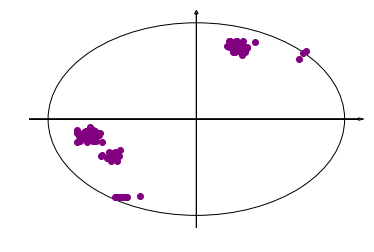

In [10]:
import pylab as lab 

circle = plt.Circle((0, 0), 6.2, fill=False)
ax = plt.gca()
ax.cla()

ax.set_xlim((-7, 7))
ax.set_ylim((-7, 7))

ax.plot(data_a, data_v, 'o', color='purple')
ax.add_artist(circle)

left,right = ax.get_xlim()
low,high = ax.get_ylim()
lab.arrow(left, 0, right -left, 0, length_includes_head = True, head_width = 0.15)
lab.arrow(0, low, 0, high-low, length_includes_head = True, head_width = 0.15)

plt.axis('off')

plt.show()

Then we compute the angle and intensity for each point and compute the mean.

In [11]:
a_list = []
i_list = []
for a,v in zip(data_a,data_v):
    a_list.append(compute_AI(a, v)[0])
    i_list.append(compute_AI(a, v)[1])

In [12]:
print('Mean angle:     ', str(np.mean(a_list)))
print('Mean intensity: ', str(np.mean(i_list)))

Mean angle:      189.4908826233749
Mean intensity:  4.262189356023489


## References
* Babuška, R. (2012). Fuzzy modeling for control (Vol. 12). Springer Science & Business Media.
* Mejía, M., Quintero, M., Lucía, O., & Castro, M. (2016). Dynamic Analysis of Emotions through Artificial Intelligence. *Avances en Psicología Latinoamericana, 34(2)*, 205-232.
* Suh, K. H., Kim, Y., & Lee, E. C. (2016). Facial feature movements caused by various emotions: differences according to sex. *Symmetry, 8(9)*, 86.